# <center>#7 : K-mean Clustering</center>

In [1]:
from sklearn.datasets import make_blobs

In [2]:
features, true_labels = make_blobs(
        n_samples=200,
        centers=3,
        cluster_std=2.75,
        random_state=42
    )

In [11]:
list(zip(features[:20],true_labels[:20]))

[(array([9.77075874, 3.27621022]), 1),
 (array([-9.71349666, 11.27451802]), 0),
 (array([-6.91330582, -9.34755911]), 2),
 (array([-10.86185913, -10.75063497]), 2),
 (array([-8.50038027, -4.54370383]), 2),
 (array([-4.82456978, -5.20159136]), 2),
 (array([-3.03819028,  9.84354132]), 0),
 (array([-8.17498253, -6.24197227]), 2),
 (array([3.91207254, 9.45363489]), 1),
 (array([-4.64425636, -5.14863028]), 2),
 (array([2.09082004, 1.80947495]), 1),
 (array([5.26539366, 5.56781226]), 1),
 (array([7.61826975, 4.87112533]), 1),
 (array([3.30512908, 2.19832357]), 1),
 (array([-0.92926328,  2.48591905]), 1),
 (array([-9.15936347, -8.42060745]), 2),
 (array([-2.70722546, 11.7740016 ]), 0),
 (array([-9.14073328, -6.20996976]), 2),
 (array([ 6.52709436, -2.46179896]), 1),
 (array([ -2.51808095, -10.28410222]), 2)]

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [14]:
scaled_features[:20]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446],
       [-0.6091802 , -0.96748146],
       [-0.27382069,  1.20384743],
       [-1.23815784, -1.11763029],
       [ 1.0309618 ,  1.14757573],
       [-0.57532971, -0.95983806],
       [ 0.68905553,  0.04436278],
       [ 1.28502265,  0.58676985],
       [ 1.72673134,  0.48622328],
       [ 0.91701946,  0.10048181],
       [ 0.1220911 ,  0.14198788],
       [-1.42295704, -1.43205314],
       [-0.21168821,  1.48245342],
       [-1.41945957, -1.11301166],
       [ 1.52188347, -0.57207183],
       [-0.17617985, -1.70099461]])

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(
        init="random",
        n_clusters=3,
        n_init=40,
        max_iter=300,
        random_state=42
   )

In [17]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=40, random_state=42)

In [32]:
kmeans.inertia_

74.57960106819854

In [33]:
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [34]:
kmeans.n_iter_

2

In [18]:
kmeans.labels_[:20]

array([2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1],
      dtype=int32)

In [19]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
sse =[]
for k in range(1,11):
    kmeans_check=KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans_check.fit(scaled_features)
    sse.append(kmeans_check.inertia_)

In [20]:
from matplotlib import pyplot as plt

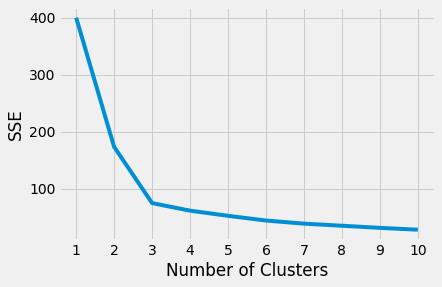

In [33]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [22]:
y_pred = kmeans.predict(scaled_features)

In [23]:
from numpy import unique,where

In [24]:
clusters = unique(y_pred)

In [25]:
centers = kmeans.cluster_centers_

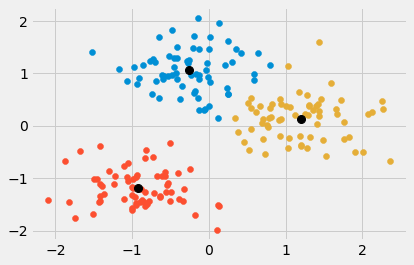

In [30]:
for cluster in clusters:
    row_ix = where(y_pred == cluster)
    plt.scatter(scaled_features[row_ix, 0], scaled_features[row_ix, 1])
plt.show()